## 목표 : 네이버 뉴스 기사 정보 가졍오기


# STEP 1. 실습 환경 준비

STEP 1-1. 실습 환경 준비 - 한글 폰트 설치

In [1]:
# Colab에서 실행하므로 폰트 설치
# 한글 워드 클라우드를 그리기 위해 한글 폰트 설치 필요
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 나눔 바른 고딕 (NanumBarunGothic)을 사용하기 위해 경로를 포함시킨다.
font_path  = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

STEP 1-2. 실습 환경 준비 - 라이브러리 설치

In [2]:
# Beautiful Soup 설치
!pip install beautifulsoup4
!pip install lxml
!pip install requests

# STEP 2. HTML 및 Beautiful Soup

STEP 2-0. HTML 정보 추출 연습

In [ ]:
#@title
#Beautiful Soup 예제 1
from bs4 import BeautifulSoup
ex1 = '''
<html>
    <head>
        <title> HTML 연습 </title>
    </head>
    <body>
        <p align="center"> text 1 </p>
        <img src="c:\\temp\\image\\솔개.png">
    </body>
</html> '''

# Beautiful Soup 실습해보기 (1) #
soup = BeautifulSoup(ex1, 'html.parser')
print( soup.find('title') )
print( soup.find('p') )

In [ ]:
#@title
#Beautiful Soup 예제 2
from bs4 import BeautifulSoup
ex1 = '''
<html>
    <head>
        <title> HTML 연습 </title>
    </head>
    <body>
        <p align="center"> text 1 </p>
        <p align="right"> text 2 </p>
        <p align="left"> text 3 </p>
        <img src="c:\\temp\\image\\솔개.png">
    </body>
<html> '''

soup = BeautifulSoup(ex1, 'html.parser')
print( soup.find('p') )
# Beautiful Soup 실습해보기 (2) #
# text 2 부분만 출력해보기 #
print( soup.find('p',align="right") )

In [5]:
#@title
#Beautiful Soup 예제 3
from bs4 import BeautifulSoup
ex1 = '''
<html>
    <head>
        <title> HTML 연습 </title>
    </head>
    <body>
        <p align="center"> text 1 </p>
        <p align="center"> text 2 </p>
        <p align="center"> text 3 </p>
        <img src="c:\\temp\\image\\솔개.png">
    </body>
<html> '''

soup = BeautifulSoup(ex1, 'html.parser')
# Beautiful Soup 실습해보기 (3) #
# text 1 부분만 출력해보기 #
# p 태그 중 가장 먼저 나오는 부분을 출력
print( soup.find('p') )

<p align="center"> text 1 </p>


In [ ]:
## Beautiful Soup 실습해보기 (4) ##
print( soup.find_all('p') )

# 배열(리스트)는 0번부터 시작!
print( soup.find_all('p')[0] )
###text 2 부분만 출력해보기####
print( soup.find_all('p')[1] )
print( soup.find_all('p')[2] )

In [6]:
#@title
#select( ) 함수 사용하기
# 연습용 html 만들기
ex2='''
<html>
    <head>
        <h1> 사야할 과일
    </head>
    <body>
        <h1> 시장가서 사야할 과일 목록
            <div><p id='fruit1' class='name1' title='바나나'> 바나나
                <span class='price'> 3000원 </span>
                <span class='count'> 10개 </span>
                <span class='store'> 바나나가게 </span>
                <a href='https://www.banana.com'> banana.com </a>
                </p>
            </div>
             <div><p id='fruit2' class='name2' title='체리'> 체리
                <span class='price'> 100원 </span>
                <span class='count'> 50개 </span>
                <span class='store'> 체리가게 </span>
                <a href='https://www.cherry.com'> cherry.com </a>
                </p>
            </div>
             <div><p id='fruit3' class='name3' title='오렌지'> 오렌지
                <span class='price'> 500원 </span>
                <span class='count'> 20개 </span>
                <span class='store'> 오렌지가게 </span>
                <a href='https://www.orange.com'> banana.com </a>
                </p>
            </div>
        </body>
    </html> '''

In [7]:
#@title
# select('태그이름')
soup2 = BeautifulSoup(ex2 , 'html.parser')

## Beautiful Soup 실습해보기 (5) ##
###p 태그 전부 출력 출력해보기####
soup2.select('p')

[<p class="name1" id="fruit1" title="바나나"> 바나나
                 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="name2" id="fruit2" title="체리"> 체리
                 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게 </span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="name3" id="fruit3" title="오렌지"> 오렌지
                 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게 </span>
 <a href="https://www.orange.com"> banana.com </a>
 </p>]

In [ ]:
#select(''.클래스이름')
soup2.select(' .name1 ')

In [8]:
#select(‘ 상위태그 > 하위태그 > 하위태그‘ )
soup2.select(' div > p > span')

[<span class="price"> 3000원 </span>,
 <span class="count"> 10개 </span>,
 <span class="store"> 바나나가게 </span>,
 <span class="price"> 100원 </span>,
 <span class="count"> 50개 </span>,
 <span class="store"> 체리가게 </span>,
 <span class="price"> 500원 </span>,
 <span class="count"> 20개 </span>,
 <span class="store"> 오렌지가게 </span>]

In [9]:
#select(‘ 상위태그 > 하위태그 > 하위태그‘ )
soup2.select(' div > p > span')[0]

<span class="price"> 3000원 </span>

In [10]:
###################################
## Beautiful Soup 실습해보기 (6) ##
###################################
###      '10개'만 출력      ####

#select(‘ 상위태그 > 하위태그 > 하위태그‘ )
soup2.select(' div > p > span')[1]

<span class="count"> 10개 </span>

In [ ]:
#select(‘ 상위태그 > 하위태그 > 하위태그‘ )
soup2.select(' div > p > span')[2]

In [11]:
# select(‘상위태그.클래스이름 > 하위태그.클래스이름’)
soup2.select(' p.name1 > span.store ')

[<span class="store"> 바나나가게 </span>]

In [ ]:
# select(‘#아이디명”)
soup2.select(' #fruit1')

In [ ]:
# select(‘#아이디명 > 태그명.클래스명)
soup2.select(' #fruit1 > span.store')

In [12]:
# select(‘태그명[속성1=값1]’)
soup2.select('a[href]')

[<a href="https://www.banana.com"> banana.com </a>,
 <a href="https://www.cherry.com"> cherry.com </a>,
 <a href="https://www.orange.com"> banana.com </a>]

In [ ]:
# select(‘태그명[속성1=값1]’)
soup2.select('a[href]')[0]

In [ ]:
## Beautiful Soup 실습해보기 (7) ##
# 태그 뒤의 텍스트만 추출하기
txt3 = soup2.select('p')
for i in txt3 :
    print(i.get_text().replace('\n','') )



*   soup.select('원하는 정보')  
select('원하는 정보') -->  단 하나만 있더라도, 복수 가능한 형태로 되어있음

* soup.select('태그명')
* soup.select('.클래스명')
* soup.select('상위태그명 > 하위태그명 > 하위태그명')
* soup.select('상위태그명.클래스명 > 하위태그명.클래스명')
바로 아래의(자식) 태그를 선택시에는 > 기호를 사용
* soup.select('상위태그명.클래스명 하~위태그명')              
아래의(자손) 태그를 선택시에는   띄어쓰기 사용
* soup.select('상위태그명 > 바로아래태그명 하~위태그명')     
* soup.select('.클래스명')
* soup.select('#아이디명')                  
태그는 여러개에 사용 가능하나 아이디는 한번만 사용 가능함! ==> 선택하기 좋음
* soup.select('태그명.클래스명)
* soup.select('#아이디명 > 태그명.클래스명)
* soup.select('태그명[속성1=값1]')


# STEP 3. 뉴스 제목 및 내용 추출

## STEP 3-1. 뉴스 제목 가져오기

In [13]:
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen

# 뉴스 페이지 접근(URL 직접 복사해오기)
URL = 'https://news.naver.com/section/105'

# HTTP Request 요청 및 BeatifulSoup 선언
res = requests.get(URL)
soup = BeautifulSoup(res.content, "lxml", from_encoding='utf-8')
soup

<!DOCTYPE html>
<html data-useragent="python-requests/2.31.0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="IT/과학 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/section/105" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="모바일, 인터넷, SNS, 통신 등 IT/과학 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="IT/과학 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content=

In [14]:
# 뉴스 제목 가져오기 strong 태그, sa_text_strong 클래스
news_titles = soup.select('strong.sa_text_strong')
news_titles

[<strong class="sa_text_strong">LG U+, 2분기 영업익 2540억원…전년比 11.8%↓</strong>,
 <strong class="sa_text_strong">안세영·신유빈 등 선수들 삼성 갤럭시AI 체험</strong>,
 <strong class="sa_text_strong">국민 57% "AI 이점, 위험보다 크다"... 편의성·효율성 기대감</strong>,
 <strong class="sa_text_strong">SK C&amp;C, AWS·MS 'AI 활용 클라우드 기술 역량' 인증 획득</strong>,
 <strong class="sa_text_strong">KT스카이라이프, AICC 오픈.. 상담 대기·시간 줄어든다</strong>,
 <strong class="sa_text_strong">크라우드웍스, 글로벌 무대에 '닥터웹 LLM 서비스' 선보인다</strong>,
 <strong class="sa_text_strong">LG헬로비전 2Q 영업익 74억, 전분기比 80% 증가</strong>,
 <strong class="sa_text_strong">위메이드, 2Q 영업손실 241억원…"'나이트 크로우' 활약에 적자 축소"</strong>,
 <strong class="sa_text_strong">'삼성SDI 효과' 필에너지, 상반기 매출 20% 성장 전망</strong>,
 <strong class="sa_text_strong">'위기 또는 기회' 위믹스 …위메이드 "하반기 블록체인 성과 낸다"</strong>,
 <strong class="sa_text_strong">김병수 로보티즈 대표, 1.1억원 규모 자사주 매입</strong>,
 <strong class="sa_text_strong">응급실에도 공보의·군의관 배치…경증환자 방문 땐 의료비 인상</strong>,
 <strong class="sa_text_strong">윤오준 국정원 3차장 "공공망 분리 제도 개선, '보안 약화' 해석은 곡해"</s

In [15]:
# select 태그는 리스트 형식으로 데이터 불러옴 -> for문을 통한 접근이 필요함
# 불러온 전체 데이터에서 텍스트만 추출
for title in news_titles:
  print(title.get_text())
  print()

LG U+, 2분기 영업익 2540억원…전년比 11.8%↓

안세영·신유빈 등 선수들 삼성 갤럭시AI 체험

국민 57% "AI 이점, 위험보다 크다"... 편의성·효율성 기대감

SK C&C, AWS·MS 'AI 활용 클라우드 기술 역량' 인증 획득

KT스카이라이프, AICC 오픈.. 상담 대기·시간 줄어든다

크라우드웍스, 글로벌 무대에 '닥터웹 LLM 서비스' 선보인다

LG헬로비전 2Q 영업익 74억, 전분기比 80% 증가

위메이드, 2Q 영업손실 241억원…"'나이트 크로우' 활약에 적자 축소"

'삼성SDI 효과' 필에너지, 상반기 매출 20% 성장 전망

'위기 또는 기회' 위믹스 …위메이드 "하반기 블록체인 성과 낸다"

김병수 로보티즈 대표, 1.1억원 규모 자사주 매입

응급실에도 공보의·군의관 배치…경증환자 방문 땐 의료비 인상

윤오준 국정원 3차장 "공공망 분리 제도 개선, '보안 약화' 해석은 곡해"

차세대발사체 지재권, 한화 '이면계약' 주장에 항우연 "없었다"

하반기 전공의 추가 모집 "이번이 마지막"…의료계 "정부 딱해"

"전동 휠체어 타고 패럴림픽 가요...사람에 꼭 필요한 기술 공급할 것"

인텔 "1.8나노급 공정 순항중...시제품 2종 운영체제 부팅 성공"

영업익 11.8% 감소한 LGU+ "전사업 AI 전환해 경쟁력 혁신할 것"(종합)

펄어비스 '검은사막', 아침의 나라 서울과 신규 무기 군왕 공개

'방문진 이사 선임' 국회 청문회 세차례 열린다

검은사막에서 만나는 경복궁…펄어비스 '아침의 나라: 서울' 출시

국정원, 판교캠퍼스서 민간과 교류 더 늘린다

'뚝심 투자' KT스카이라이프, ENA 채널 시청률 '우영우' 때 넘었다

카카오뱅크 "카카오 대주주 적격성, 일부 영역 진출만 제한"

삼성전자, 또 '엔비디아 승인' 뜬소문...HBM 공급 임박했나

세계서 가장 오래된 ‘1만 2000년 전’ 달력 발견…“별자리까지 기록”[핵잼 사이언스]

파리올림픽 선수단에 준 갤플립6, 현지 중고사이트서 거래



## STEP 3-2. 뉴스 본문 가져오기(1)

In [16]:
# 태그가 포함된 뉴스 본문 가져오기
news_contents =soup.select('div.sa_text_lede')
news_contents

[<div class="sa_text_lede">LG유플러스의 올 2·4분기 영업이익이 지난해 동기와 대비해서 주춤했다. 유·무선 분야 양적 지표가 소폭 개선된 가운데, 무형자산 상각비가 반영된 결과라고 LG유플러스는 설명했다. 추후 사업 중 가장 성장률이 높은 </div>,
 <div class="sa_text_lede">삼성전자는 안세영(배드민턴)·신유빈(탁구) 등 ‘팀 삼성 갤럭시’ 멤버 선수들이 2024 파리 올림픽 선수촌 내 삼성 올림픽 체험관을 방문했다고 6일 밝혔다. 삼성전자에 따르면 안세영, 신유빈과 알레한드라 오로즈코 </div>,
 <div class="sa_text_lede">우리 국민 과반수가 AI(인공지능)의 잠재적 위험에 비해 잠재적 이점이 더 많다고 평가했다. 일상 생활의 편의성 향상과 업무 효율성 증진에 대한 기대감이 큰 것으로 나타난 반면 AI의 설계·오작동에 따른 피해나 악의</div>,
 <div class="sa_text_lede">SK C&amp;C는 ‘AWS MSP 6.0 파트너’와 ‘애널리틱스 온 마이크로소프트(MS) 애저 스페셜라이제이션’ 인증을 취득했다고 7일 밝혔다. 이번 인증은 기존 클라우드 서비스 능력에 더해 고객 시스템 및 애플리케이션</div>,
 <div class="sa_text_lede">KT스카이라이프는 지난 5일 인공지능고객센터(AICC)를 정식으로 오픈했다고 6일 밝혔다. 이번 AICC 오픈으로 상담사의 생산성과 소비자 만족도를 높일 것으로 회사는 기대했다. KT스카이라이프 AICC는 KT의 A</div>,
 <div class="sa_text_lede">AI 기업 크라우드웍스가 오는 12일부터 14일까지 미국 라스베이거스에서 열리는 'Ai4 비즈니스 컨퍼런스'에서 의료진 대상 LLM(거대언어모델) 서비스인 '닥터웹(DoctorWebb)' 베타버전을 글로벌 무대에서 </div>,
 <div class="sa_text_lede">LG헬로비전은 7일 공시를 통해 올 2분기 연결재무제표 기준 영업수익(

In [17]:
# for문을 이용하여 전체 뉴스 데이터에서 텍스트만 추출
for content in news_contents:
  print(content.get_text())
  print()

LG유플러스의 올 2·4분기 영업이익이 지난해 동기와 대비해서 주춤했다. 유·무선 분야 양적 지표가 소폭 개선된 가운데, 무형자산 상각비가 반영된 결과라고 LG유플러스는 설명했다. 추후 사업 중 가장 성장률이 높은 

삼성전자는 안세영(배드민턴)·신유빈(탁구) 등 ‘팀 삼성 갤럭시’ 멤버 선수들이 2024 파리 올림픽 선수촌 내 삼성 올림픽 체험관을 방문했다고 6일 밝혔다. 삼성전자에 따르면 안세영, 신유빈과 알레한드라 오로즈코 

우리 국민 과반수가 AI(인공지능)의 잠재적 위험에 비해 잠재적 이점이 더 많다고 평가했다. 일상 생활의 편의성 향상과 업무 효율성 증진에 대한 기대감이 큰 것으로 나타난 반면 AI의 설계·오작동에 따른 피해나 악의

SK C&C는 ‘AWS MSP 6.0 파트너’와 ‘애널리틱스 온 마이크로소프트(MS) 애저 스페셜라이제이션’ 인증을 취득했다고 7일 밝혔다. 이번 인증은 기존 클라우드 서비스 능력에 더해 고객 시스템 및 애플리케이션

KT스카이라이프는 지난 5일 인공지능고객센터(AICC)를 정식으로 오픈했다고 6일 밝혔다. 이번 AICC 오픈으로 상담사의 생산성과 소비자 만족도를 높일 것으로 회사는 기대했다. KT스카이라이프 AICC는 KT의 A

AI 기업 크라우드웍스가 오는 12일부터 14일까지 미국 라스베이거스에서 열리는 'Ai4 비즈니스 컨퍼런스'에서 의료진 대상 LLM(거대언어모델) 서비스인 '닥터웹(DoctorWebb)' 베타버전을 글로벌 무대에서 

LG헬로비전은 7일 공시를 통해 올 2분기 연결재무제표 기준 영업수익(매출)이 2836억원으로 전분기 대비 6.1% 늘고 영업이익이 74억원으로 같은 기간 80.2% 늘어난 것으로 잠정집계됐다고 밝혔다. 다만 전년 

위메이드(112040)가 '나이트 크로우' 글로벌 매출 증가에 힘입어 전년 대비 영업 손실 규모를 줄였다. 위메이드는 연결 기준 올해 2분기 잠정 영업손실이 241억 원으로, 전년 동기(403억 원) 대비 적자 폭을

이차전지 장비사 필에너지가 올해 상반기 실적

## STEP 3-3. 뉴스 링크 가져오기

In [18]:
# a[href]이용, 뉴스 링크가 포함된 코드 전부 가져오기
news_links = soup.select('a[href]')
news_links

[<a href="#ct">본문 바로가기</a>,
 <a class="Nlogo_link _LINK" data-clk="gnb.naver" data-pc-url="https://www.naver.com/" data-url="https://m.naver.com/" href="https://m.naver.com/"><span class="Nicon_logo">NAVER</span></a>,
 <a class="_LINK" data-clk="gnb.news" data-pc-url="https://news.naver.com/" data-url="https://m.news.naver.com" href="https://m.news.naver.com"><span class="Nicon_service">뉴스</span></a>,
 <a class="_LINK" data-clk="gnb.entertain" data-pc-url="https://entertain.naver.com/home" data-url="https://m.entertain.naver.com" href="https://m.entertain.naver.com">
 <span class="Nicon_family Nicon_entertain">연예</span>
 </a>,
 <a class="_LINK" data-clk="gnb.sports" data-pc-url="https://sports.news.naver.com/index" data-url="https://m.sports.naver.com" href="https://m.sports.naver.com">
 <span class="Nicon_family Nicon_sports">스포츠</span>
 </a>,
 <a data-clk="gnb.weather" href="https://weather.naver.com">
 <span class="Nicon_family Nicon_weather">날씨</span>
 </a>,
 <a data-clk="gnb.premi

In [19]:
# for문과 attrs['href'], href태그만 추출하기
for link in news_links:
  href = link.attrs['href']
  print(href)

#ct
https://m.naver.com/
https://m.news.naver.com
https://m.entertain.naver.com
https://m.sports.naver.com
https://weather.naver.com
https://contents.premium.naver.com
javascript:;
https://news.naver.com/
https://news.naver.com/section/100
https://news.naver.com/section/101
https://news.naver.com/section/102
https://news.naver.com/section/103
https://news.naver.com/section/105
https://news.naver.com/section/104
https://news.naver.com/main/ranking/popularDay.naver?mid=etc&sid1=111
https://news.naver.com/newspaper/home
https://news.naver.com/main/opinion/home.naver
https://news.naver.com/main/tv/index.naver?mid=tvh
https://news.naver.com/main/factcheck/main.naver
https://media.naver.com/algorithm
https://news.naver.com/main/ombudsman/errorArticleList.naver?mid=omb
https://news.naver.com/main/officeList.naver
https://newsstand.naver.com/
https://newslibrary.naver.com/search/searchByDate.nhn
/section/105
/breakingnews/section/105/731
/breakingnews/section/105/226
/breakingnews/section/105/

In [21]:
# 정확하게 뉴스 링크만 있는 부분으로 접근
news_links = soup.select('div.sa_thumb_inner > a[href]')

# href태그만 추출
for link in news_links:
  href = link.attrs['href']
  print(href)

https://n.news.naver.com/mnews/article/014/0005224474
https://n.news.naver.com/mnews/article/082/0001282770
https://n.news.naver.com/mnews/article/008/0005074102
https://n.news.naver.com/mnews/article/031/0000859892
https://n.news.naver.com/mnews/article/014/0005223773
https://n.news.naver.com/mnews/article/138/0002179322
https://n.news.naver.com/mnews/article/008/0005074035
https://n.news.naver.com/mnews/article/421/0007714356
https://n.news.naver.com/mnews/article/030/0003229870
https://n.news.naver.com/mnews/article/008/0005074141
https://n.news.naver.com/mnews/article/092/0002341235
https://n.news.naver.com/mnews/article/366/0001010415
https://n.news.naver.com/mnews/article/003/0012715113
https://n.news.naver.com/mnews/article/584/0000028207
https://n.news.naver.com/mnews/article/421/0007716093
https://n.news.naver.com/mnews/article/092/0002341229
https://n.news.naver.com/mnews/article/092/0002341228
https://n.news.naver.com/mnews/article/031/0000860004
https://n.news.naver.com/mne

In [44]:
# 추출한 링크중 하나의 링크를 복사해서 뉴스 페이지 접근
URL = 'https://n.news.naver.com/mnews/article/081/0003470613'

# HTTP Request 요청 및 BeatifulSoup 선언
res = requests.get(URL)
soup1 = BeautifulSoup(res.content, "lxml", from_encoding='utf-8')

# 제목 가져오기
title = soup1.select('h2.media_end_head_headline')[0].get_text()

# 시간 가져오기
time = soup1.select('span.media_end_head_info_datestamp_time')[0].get_text()

# 부제목 가져오기
sub_title = soup1.select('article.go_trans > strong')[0].get_text()

# 본문 가져오기
content = soup1.select('article.go_trans')[0].get_text().replace('\n', "")
content = content.replace("\'","")

# 본문에서 부제목 제거
content.replace(sub_title, "")

title

'세계서 가장 오래된 ‘1만 2000년 전’ 달력 발견…“별자리까지 기록”[핵잼 사이언스]'

## STEP 3-4. 여러 뉴스에서 본문 추출하기

In [38]:
# 다양한 뉴스 정보를 저장하기 위한 리스트
title_list = []
sub_title_list = []
time_list = []
content_list = []

for link in news_links:
  # HTTP Request 요청 및 BeatifulSoup 선언
  URL = link.attrs['href']
  res = requests.get(URL)
  soup = BeautifulSoup(res.content, "lxml", from_encoding='utf-8')

  # 제목 추출후 리스트에 저장
  title_list.append(soup.select('h2.media_end_head_headline')[0].get_text())

  # 시간 가져오기
  time_list.append(soup.select('span.media_end_head_info_datestamp_time')[0].get_text())

  # 부제목 가져오기
  try:
    sub_title_list.append(soup.select('article.go_trans > strong')[0].get_text())
  except:
    sub_title_list.append("-")

  # 본문 가져오기
  content_list.append(soup.select('article.go_trans')[0].get_text().replace('\n', ""))

title_list

['LG U+, 2분기 영업익 2540억원…전년比 11.8%↓',
 '안세영·신유빈 등 선수들 삼성 갤럭시AI 체험',
 '국민 57% "AI 이점, 위험보다 크다"... 편의성·효율성 기대감',
 "SK C&C, AWS·MS 'AI 활용 클라우드 기술 역량' 인증 획득",
 'KT스카이라이프, AICC 오픈.. 상담 대기·시간 줄어든다',
 "크라우드웍스, 글로벌 무대에 '닥터웹 LLM 서비스' 선보인다",
 'LG헬로비전 2Q 영업익 74억, 전분기比 80% 증가',
 '위메이드, 2Q 영업손실 241억원…"\'나이트 크로우\' 활약에 적자 축소"',
 "'삼성SDI 효과' 필에너지, 상반기 매출 20% 성장 전망",
 '\'위기 또는 기회\' 위믹스 …위메이드 "하반기 블록체인 성과 낸다"',
 '김병수 로보티즈 대표, 1.1억원 규모 자사주 매입',
 '응급실에도 공보의·군의관 배치…경증환자 방문 땐 의료비 인상',
 '윤오준 국정원 3차장 "공공망 분리 제도 개선, \'보안 약화\' 해석은 곡해"',
 '차세대발사체 지재권, 한화 \'이면계약\' 주장에 항우연 "없었다"',
 '하반기 전공의 추가 모집 "이번이 마지막"…의료계 "정부 딱해"',
 '"전동 휠체어 타고 패럴림픽 가요...사람에 꼭 필요한 기술 공급할 것"',
 '인텔 "1.8나노급 공정 순항중...시제품 2종 운영체제 부팅 성공"',
 '영업익 11.8% 감소한 LGU+ "전사업 AI 전환해 경쟁력 혁신할 것"(종합)',
 "펄어비스 '검은사막', 아침의 나라 서울과 신규 무기 군왕 공개",
 "'방문진 이사 선임' 국회 청문회 세차례 열린다",
 "검은사막에서 만나는 경복궁…펄어비스 '아침의 나라: 서울' 출시",
 '국정원, 판교캠퍼스서 민간과 교류 더 늘린다',
 "'뚝심 투자' KT스카이라이프, ENA 채널 시청률 '우영우' 때 넘었다",
 '카카오뱅크 "카카오 대주주 적격성, 일부 영역 진출만 제한"',
 "삼성전자, 또 '엔비디아 승인' 뜬소문...HBM 공급 임박했나",
 

In [39]:
sub_title_list

["유무선 양적 지표 개선 속무형자산상각비 반영된 결과기업인프라 매출 5.4% 증가B2B 중장기 전략 '올인AI' 시동",
 '-',
 '-',
 '‘AI랜딩존’ 우수성 입증…기업 클라우드 환경에 맞춰 AI 서비스 지원',
 '-',
 '-',
 '-',
 '2분기 매출 1714억원…순이익 4.4억원으로 흑전위메이드맥스, 2분기 매출 187억원·영업손실 13억원',
 '-',
 '2Q 컨콜…"블록체인 게임 플랫폼 개편, 블록체인 결제시스템 공개"장현국·법인 기소에도…"사업적 이슈 없다, 재판 성실히 임할 것"',
 '"하반기 자율주행로봇 사업 국내외 확대 자신감"',
 '-',
 '경기도 성남 판교캠퍼스에서 열린 간담회 통해 \'망보안 제도 개선\' 언급업무 중요도에 따라 보안체계를 차등 적용하는 방안 검토윤오준 3차장  "일각이 우려하는 보안약화는 제도개선 목적과 다르다" 설명',
 '-',
 '신청 14·16일 마감…사직 레지던트 11%는 다른 병원 취업전공의들, 개원·해외취업 시도…"힘들게 수련받고 싶지 않아"',
 '[신나는 로봇세상] ㊳ 박동현 하이코어 대표 인터뷰',
 '"양대 신기술 \'리본펫·파워비아\' 투입... EDA 업체와 협업 강화"',
 "영업익 감소, 新전산망 구축 상각비 영향…지난해 4분기부터 비용 반영무선 가입회선, 4개 분기 연속 20%대 성장…MNO 회선 2000만 달성 '목전'기업 인프라 매출 5.4% 증가…B2B 중장기 성장 전략 'All in AI' 시동",
 '지난해 3월 출시한 아침의 나라 후속편',
 '9일 청문에 김태규 부위원장 불참 통보...2·3차 청문회도 야당 주도로 계획서 채택',
 '수도 서울 모험하는 이야기…경복궁, 광화문, 창덕궁 등 구현',
 "사이버안보협력센터→'판교캠퍼스'로…9월 '사이버파트너스' 출범",
 'ENA 창사 이래 최고 시청률 순위 8위나는솔로 20기·드라마 크래쉬 등 시청률 흥행AI 아마추어 스포츠 중계로 신사업 발굴',
 '김석 COO "라이선스 받기보다 협업 노력"',
 '-',


## STEP 4. 정형화 및 저장

In [40]:
# 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd

# 추출된 정보를 가진 데이터 프레임 생성
data = {}
data['title'] = title_list
data['sub title'] = sub_title_list
data['time'] = time_list
data['content list'] = content_list

# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(data)

# 파일위치 지정 후 csv파일로 저장
df.to_csv('/content/drive/MyDrive/BootCamp/5주차 데이터분석 응용/[1일차] 데이터 분석 및 웹 크롤링/news_data.csv')

# STEP 5. 한글 분석 모듈 'koNLPy'을 통한 형태소 분석

## STEP 5-1. koNLP 모듈 설치

In [45]:
# ======= 형태소 분석을 위해 한글 분석 모듈 konlpy를 설치한다. =============
!python -m pip install konlpy
import konlpy
print('KoNLPy version...:', konlpy.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.9 MB/s eta 0:00:00
KoNLPy version...: 0.6.0


## STEP 5-2. 형태소 분석 진행

In [48]:
# 한국어 텍스트 분석에 필요한 모듈(konlpy)의 Open Korean Text 형태소 분석기를 불러온다.
from konlpy.tag import Okt  # 토큰화 하는 작업. 속도가 매우 느림.
from collections import Counter # 빈도수 딕셔너리
from wordcloud import WordCloud # 워드 클라우드
import matplotlib.pyplot as plt # 차트 지원
import matplotlib as mpl

In [49]:
# 앞서 저장한 리뷰 텍스트 파일 열기
with open ('/content/drive/MyDrive/BootCamp/5주차 데이터분석 응용/[1일차] 데이터 분석 및 웹 크롤링/news_data.csv', 'r', encoding='utf-8') as f:
  doc = f.read()

In [50]:
# Open Korean Text 형태소 분석기 객체를 생성한다.
okt = Okt()

In [51]:
# 문장에서 명사만 추출
nouns = okt.nouns(doc)

In [52]:
# 단어의 길이가 1개인 것은 제외하고, 리스트에 담는다.
words = [n for n in nouns if len(n) > 1]
print (len(nouns))

15332


In [53]:
from collections import Counter
# nouns 리스트에 있는 서로 다른 명사의 개수 구한다.
count = Counter(nouns)
len(count)

2870

In [54]:
# 가장 자주 출현하는 명사 100개를 추출한다.
data = count.most_common(100)
data[:5]

[('등', 155), ('것', 140), ('수', 125), ('사업', 111), ('매출', 104)]

# STEP 6. 워드 클라우드 생성

In [55]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=font_path,
  width=1000, height = 1000,
  max_words=100,
#  scale=2.0,
#  relative_scaling=0.2,
  max_font_size=250,
  background_color='white',
).generate_from_frequencies(dict(data))

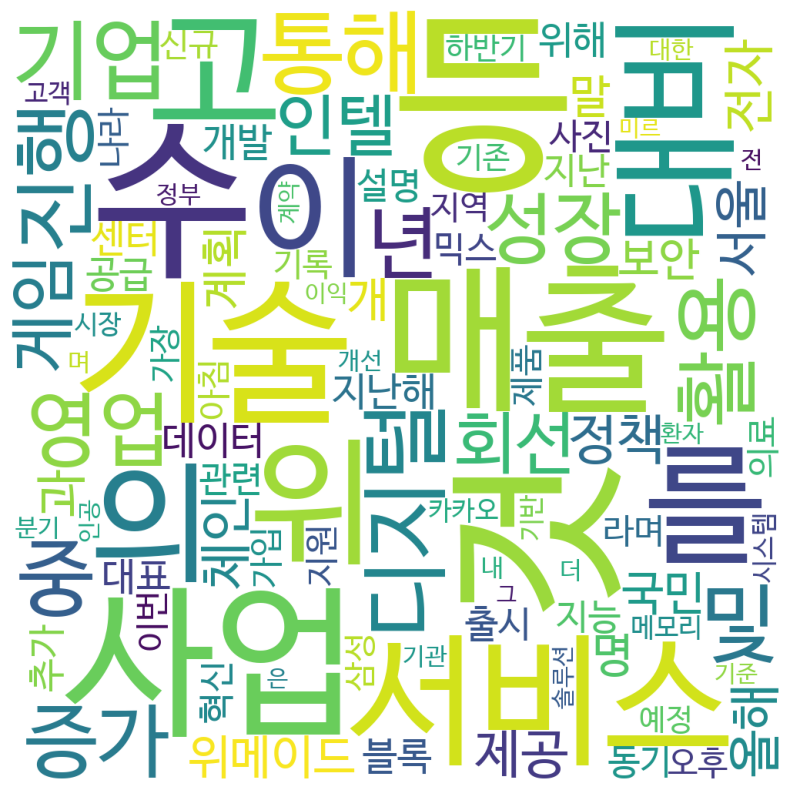

In [56]:
from matplotlib import pyplot

pyplot.figure(figsize=(16, 10))  # width, height in inches
# wordcloud 를 pyplot으로 출력
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

# 구글 이미지 크롤링

In [57]:
from bs4 import BeautifulSoup
import requests
import urllib
import urllib.request

# 이미지 검색된 URL
URL = 'https://www.google.com/search?sca_esv=c1c83ae130d39436&sxsrf=ADLYWILozrDf_RQZshEVRKlrH_0ItgosyA:1723015336338&q=%EA%B3%A0%EC%96%91%EC%9D%B4&udm=2&fbs=AEQNm0DmKhoYsBCHazhZSCWuALW8l8eUs1i3TeMYPF4tXSfZ9zKNKSjpwusJM2dYWg4btGKvTs8msUkFt41RLL2EsYFXj1HJ-6Tz3zY-OaA8p5OIwLlYAhqYgKeQsybVCfK3TClp5eJ8pKyvjHPuKkxzOkfs39PPooyb18QionBChgkg3bORCI0L1Q6BO3S5b3bJfdHG6epm&sa=X&sqi=2&ved=2ahUKEwiwmsKorOKHAxVbcfUHHcU6DEoQtKgLegQIDxAB&biw=1920&bih=953&dpr=1'

# HTTP Request 요청 및 BeatifulSoup 선언
res = requests.get(URL)
soup = BeautifulSoup(res.content, "lxml", from_encoding='utf-8')
soup

<!DOCTYPE html PUBLIC "-//WAPFORUM//DTD XHTML Mobile 1.0//EN" "http://www.wapforum.org/DTD/xhtml-mobile10.dtd">
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="application/xhtml+xml; charset=utf-8" http-equiv="Content-Type"/><meta content="no-cache" name="Cache-Control"/><title>고양이 - Google Search</title><style>a{text-decoration:none;color:inherit}a:hover{text-decoration:underline}a img{border:0}body{font-family:arial,sans-serif;padding:8px;margin:0 auto;max-width:700px;min-width:240px;}.FbhRzb{border-left:thin solid #dadce0;border-right:thin solid #dadce0;border-top:thin solid #dadce0;height:40px;overflow:hidden}.n692Zd{margin-bottom:10px}.cvifge{height:40px;border-spacing:0}.QvGUP{height:40px;padding:0 8px 0 8px;vertical-align:top}.O4cRJf{height:40px;width:100%;padding:0;padding-right:14px}.O1ePr{height:40px;padding:0;vertical-align:top}.kgJEQe{height:36px;width:98px;vertical-align:top;margin-top:4px}.lXLRf{vertical-align:top}.MhzMZd{border:0;vertical-align:

In [59]:
# 이미지 추출 코드
images = soup.select('img.DS1iW')

images

[<img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMz_Ei8NM2Rfq8ch8s0BEbmhB5fMt-lDCzikzZJqbBbSGTbsvAB1glecTuCg&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_-iCWwaJl8hFaOhY6XVfErYVYdhaY1cnKZga6JhbyE0xV5NwLPsYp0U2VLg&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBRIK4Sl_P6Zu4CSoL-zFmm04N7uy41P2r_B7geTRdJSuqhM1SOxMdLNGxieM&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5FQKoQL09idreVGteQ6E8HSYhSVJ62rlY-hGGrfCWNLoRsHS55y0Xe_eK7RE&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtZwhSrZfZEvki6aSpn98xtq-m4pS41QYJzLw8ihriZFN6KsjoIXQq-jWKlw&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbnqZ_s0GG1kXjxBdN2emBymVDhBlAndOViQmnz9MXGSVVooGtjfCVgoJ8JGE&amp;s"/>,
 <img alt="" class="DS1iW" src="https://encrypted-tbn0.

In [60]:
comic_imgs = []
num = 0

# 이미지 파일로 저장하기
for img in images:
  img = img['src']      # img = img.get("src")
  comic_imgs.append(img)
  print(img)

  # 파일명 : 폴더위치/파일번호.jpg
  filename = '/content/drive/MyDrive/BootCamp/5주차 데이터분석 응용/[1일차] 데이터 분석 및 웹 크롤링/파이썬 및 Pandas 복습/cat_img'+str(num) + '.jpg'

  # urllib.request.urlretrieve(이미지 웹주소, 파일위치)
  urllib.request.urlretrieve(img, filename)
  num = num + 1


comic_imgs = []
num = 0

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMz_Ei8NM2Rfq8ch8s0BEbmhB5fMt-lDCzikzZJqbBbSGTbsvAB1glecTuCg&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_-iCWwaJl8hFaOhY6XVfErYVYdhaY1cnKZga6JhbyE0xV5NwLPsYp0U2VLg&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBRIK4Sl_P6Zu4CSoL-zFmm04N7uy41P2r_B7geTRdJSuqhM1SOxMdLNGxieM&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5FQKoQL09idreVGteQ6E8HSYhSVJ62rlY-hGGrfCWNLoRsHS55y0Xe_eK7RE&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtZwhSrZfZEvki6aSpn98xtq-m4pS41QYJzLw8ihriZFN6KsjoIXQq-jWKlw&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbnqZ_s0GG1kXjxBdN2emBymVDhBlAndOViQmnz9MXGSVVooGtjfCVgoJ8JGE&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ45WpI3hGDGk_FGyl-dFj24TL_dXXg2i3LhTOvHwZ4jeQXjeA4NW6CPnaOxA&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtIf35uSkCfELC-jjTtZAVg-T47QzHigWTF-HGuyjZRRnGl5ojMQs_xaXJPBg&s
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQn5sBU